# IBM Advanced Data Science Capstone project.

# Forecasting a Stock Price | Prediction Models for Amazon.com

### Analysis using linear models such as Linear Regression, K-Nearest Neighbor(KNN) and Support Vector Machine(SVM) to using a Time Series Forcasting model like RNN-LSTM meaning Recurrent Neural Network Long Short Term Memory.

### RNN - LSTM - Time Series Forecasting  Model - Can Performance be Improved?

#### The Goal:

In [3]:
print('Working with the historical Data of the company name Amazon.com, which has its equity or stock that trades in the NASDAQ market under the symbol AMZN, my goal here is to see if I can improve the model by changing some model building parameters.') 

Working with the historical Data of the company name Amazon.com, which has its equity or stock that trades in the NASDAQ market under the symbol AMZN, my goal here is to see if I can improve the model by changing some model building parameters.


#### In this analysis the question is can I improve the LSTM-Time Series Model performance?

#### Install and Import Libraries:

In [1]:
# For model builing
!pip install tensorflow==2.2.0rc0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 515.9 MB 27 kB/s  eta 0:00:011     |██████████▉                     | 174.1 MB 70.2 MB/s eta 0:00:05
     |████████████████████████████████| 26.1 MB 5.1 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:


      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [2]:
# for model building
import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [3]:
# for model building
!pip install keras

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [4]:
# for ETL
import numpy as np
import pandas as pd
import math
from math import sqrt

In [5]:
#for metrics and scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [6]:
#for model building and compiling
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

In [7]:
# for webscraping
!pip install yfinance

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=ab9d6df0dbb8b9d47abebf36845cdd330c7dfc4759073d85b988869b37458d84
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=a1baab38e0c9c1d834988c7839b4af58429aa256ecdcc2e9bb93efd6c091834e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Succ

In [8]:
#for webscraping
import yfinance as yf 

In [9]:
#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Using LSTM - Time Series Forecasting to make stock prediction

In [109]:
print("LSTM Time Series Forecasting is a deep learning model.  LSTM stands for Long-Short-Term Memory.  It is a Recurrent Neural Network of deep Learning     algorithms in Machine Learning.")

LSTM Time Series Forecasting is a deep learning model.  LSTM stands for Long-Short-Term Memory.  It is a Recurrent Neural Network of deep Learning     algorithms in Machine Learning.


### Getting the dataset for Training

In [10]:
# Working with AMAZON.COM  
#Total data set starts '2009-04-01' ends '2021-03-31'(3020,7)
#Train data set starts '2009-04-01' ends '2018-03-31'(1812,7)
#Test data set starts '2018-04-01' ends '2021-03-31'(755,7)
#validation data is set at 20 percent (453,7)

ticker = yf.Ticker("AMZN")
data1 = ticker.history(start = "2009-04-01", end = "2021-03-31")
data1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-04-01,73.019997,75.089996,71.709999,73.500000,7041400,0,0
2009-04-02,73.629997,77.239998,73.440002,76.339996,11066900,0,0
2009-04-03,76.419998,78.320000,75.500000,78.169998,5809900,0,0
2009-04-06,77.260002,78.360001,76.000000,77.989998,5751300,0,0
2009-04-07,76.970001,77.080002,74.879997,75.510002,5748800,0,0


In [11]:
data1.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,2959000,0,0
2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3563500,0,0
2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3312900,0,0
2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,2746000,0,0
2021-03-30,3070.010010,3073.000000,3034.000000,3055.290039,2337600,0,0


In [12]:
data1.shape

(3020, 7)

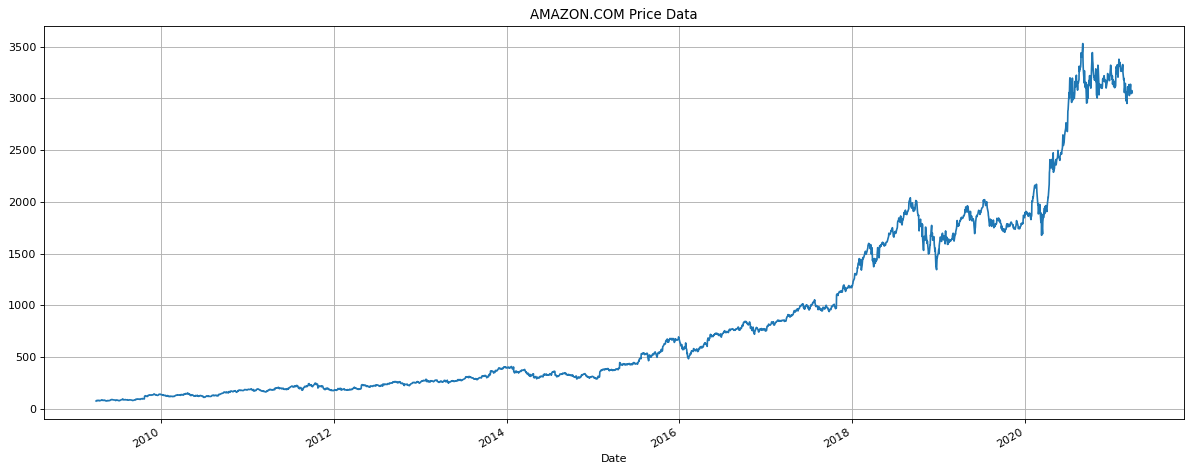

In [13]:
# Sorting the dataframe as per date
data1.sort_values('Date', inplace=True, ascending=True)
# The steep drop for covid-19 was in March of 2020. 
#Visualize the data
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
data1['Close'].plot()
plt.title("AMAZON.COM Price Data")
plt.tight_layout()
plt.grid()
plt.show()

In [18]:
print("This dataset has 7 columns, the dividends and the stock split colunms are not necessary for this process.")

This dataset has 7 columns, the dividends and the stock split colunms are not necessary for this process.


In [14]:
# Data cleaning # Removing dividends column and stock split column
data1['Date'] = data1.index
df = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Close','Volume'])
df['Open'] = data1['Open']
df['High'] = data1['High']
df['Low'] = data1['Low']
df['Close'] = data1['Close']
df['Volume']= data1['Volume']

In [15]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-04-01,73.019997,75.089996,71.709999,73.500000,7041400
2009-04-02,73.629997,77.239998,73.440002,76.339996,11066900
2009-04-03,76.419998,78.320000,75.500000,78.169998,5809900
2009-04-06,77.260002,78.360001,76.000000,77.989998,5751300
2009-04-07,76.970001,77.080002,74.879997,75.510002,5748800


### Create a Dataset for the LSTM model 

In [21]:
print('Preparing the dataset for training purpose. 25 percent is set aside for the test data')

Preparing the dataset for training purpose. 25 percent is set aside for the test data


In [17]:
#Get close data
training_set = [['Close']].copy()

In [18]:
# Split dataset into train and test
training_set = df.iloc[0:-755].values
test_set = df.iloc[-755:len(df)]
print(len(training_set), len(test_set))

2265 755


In [19]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
# Creating a data stucture of 50 time_steps and 1 output
X_train = []
y_train = []
for i in range (50,len(training_set)):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

    
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    

### Creating and Training a New LSTM Model to Strive for Better Performance

In [112]:
print("From the training data set I have written an automatic set up for a 20 percent validation split so later I could visualize how the losses fit over the epochs. After doing further research and did different LSTM set up increasing the number of epochs to 100 from 50 gave me a better fit.  Look at the  plots below.")

From the training data set I have written an automatic set up for a 20 percent validation split so later I could visualize how the losses fit over the epochs. After doing further research and did different LSTM set up increasing the number of epochs to 100 from 50 gave me a better fit.  Look at the  plots below.


In [21]:
# Define the Lstm model
lstm_model = Sequential()
lstm_model.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.summary()

# Model Training 
# Compile
history = lstm_model.fit(X_train, y_train, epochs=100, validation_split=0.20, batch_size=32, shuffle=False)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 200)           161600    
_________________________________________________________________
dropout (Dropout)            (None, 50, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                50200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 211,851
Trainable params: 211,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
56/56 [==============================] - 15s 272ms/step - loss: 6.6543e-04 - val_loss: 0.0065
Epoch 2/10

Epoch 68/100
56/56 [==============================] - 13s 238ms/step - loss: 2.1053e-04 - val_loss: 1.8525e-04
Epoch 69/100
56/56 [==============================] - 13s 233ms/step - loss: 2.3021e-04 - val_loss: 2.2364e-04
Epoch 70/100
56/56 [==============================] - 13s 235ms/step - loss: 2.2723e-04 - val_loss: 2.1468e-04
Epoch 71/100
56/56 [==============================] - 14s 242ms/step - loss: 1.0991e-04 - val_loss: 2.9275e-04
Epoch 72/100
56/56 [==============================] - 13s 240ms/step - loss: 1.0986e-04 - val_loss: 3.4520e-04
Epoch 73/100
56/56 [==============================] - 13s 240ms/step - loss: 1.0447e-04 - val_loss: 1.9678e-04
Epoch 74/100
56/56 [==============================] - 13s 237ms/step - loss: 1.1067e-04 - val_loss: 1.5764e-04
Epoch 75/100
56/56 [==============================] - 14s 245ms/step - loss: 1.3668e-04 - val_loss: 1.5405e-04
Epoch 76/100
56/56 [==============================] - 14s 245ms/step - loss: 1.5150e-04 - val_loss: 2.1639e-04
E

In [80]:
history

#### Model Evaluation

#### Post-training, plot the loss as:

In [113]:
print('Evaluation of how the model has trained over the epochs.  Now epoch equal to 100. Have the changes make a diffence?')

Evaluation of how the model has trained over the epochs.  Now epoch equal to 100. Have the changes make a diffence?


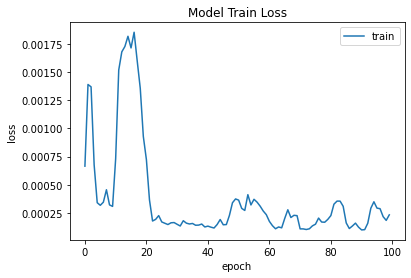

In [22]:
# Plot Model train loss over the epoch
plt.plot(history.history['loss'])
plt.title('Model Train Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train']);
plt.show()

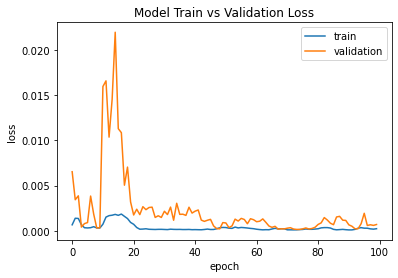

In [23]:
# Plot train and validation loss ove epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation']);
plt.show()

In [115]:
print('Yes the model has a better fit over the epoch. But can the model perform well against the test data set?')

Yes the model has a better fit over the epoch. But can the model perform well against the test data set?


#### Model Deployment

###### Prepare the test data

In [24]:
# Get the test data prices start '2018-04-01' end '2021-03-31'
#set period =  from April 01 of 2018 to March 31 of 2021
ticker = yf.Ticker("AMZN")
data_test = ticker.history(start = "2018-04-01", end = "2021-03-31")
data_test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02,1417.619995,1421.359985,1355.000000,1371.989990,10463600,0,0
2018-04-03,1391.380005,1414.000000,1355.329956,1392.050049,10231200,0,0
2018-04-04,1358.239990,1415.390015,1352.880005,1410.569946,6982300,0,0
2018-04-05,1441.989990,1459.560059,1427.069946,1451.750000,6413500,0,0
2018-04-06,1429.969971,1452.500000,1400.260010,1405.229980,5882300,0,0


In [25]:
data_test.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,2959000,0,0
2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3563500,0,0
2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3312900,0,0
2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,2746000,0,0
2021-03-30,3070.010010,3073.000000,3034.000000,3055.290039,2337600,0,0


In [26]:
data_test.shape

(755, 7)

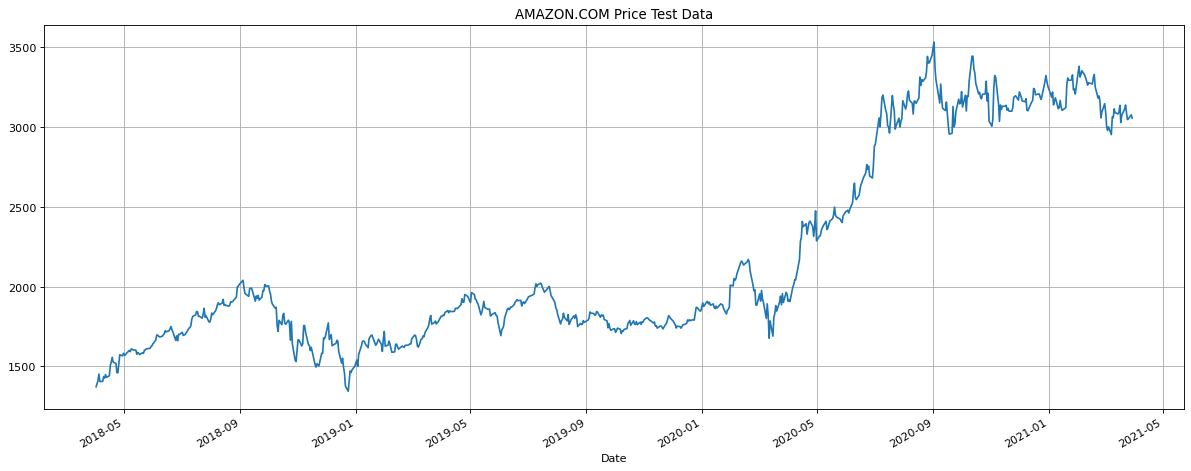

In [27]:
# The steep drop for covid-19 was in March of 2020. 
#Visualize the data
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
data_test['Close'].plot()
plt.title("AMAZON.COM Price Test Data")
plt.tight_layout()
plt.grid()
plt.show()

In [28]:
# Data cleaning # Removing dividends column and stock split column
data_test['Date'] = data_test.index
df_test = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Close','Volume'])
df_test['Open'] = data_test['Open']
df_test['High'] = data_test['High']
df_test['Low'] = data_test['Low']
df_test['Close'] = data_test['Close']
df_test['Volume']= data_test['Volume']
df_test.shape

(755, 5)

###### Reshaping the data: 

In [29]:
real_stock_price = df_test.iloc[:, 1:2].values

In [30]:
dataset_total = pd.concat((df['Open'], df_test['Open']), axis = 0) 

In [31]:
inputs = dataset_total[len(dataset_total) - len(df_test) - 50:].values 

In [32]:
inputs = inputs.reshape(-1, 1)
inputs = sc.fit_transform(inputs)
X_test = []
for i in range(50, inputs.shape[0]):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(755, 50, 1)


### Make Prediction using test set

In [33]:
# Predict the price with the model
predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the results

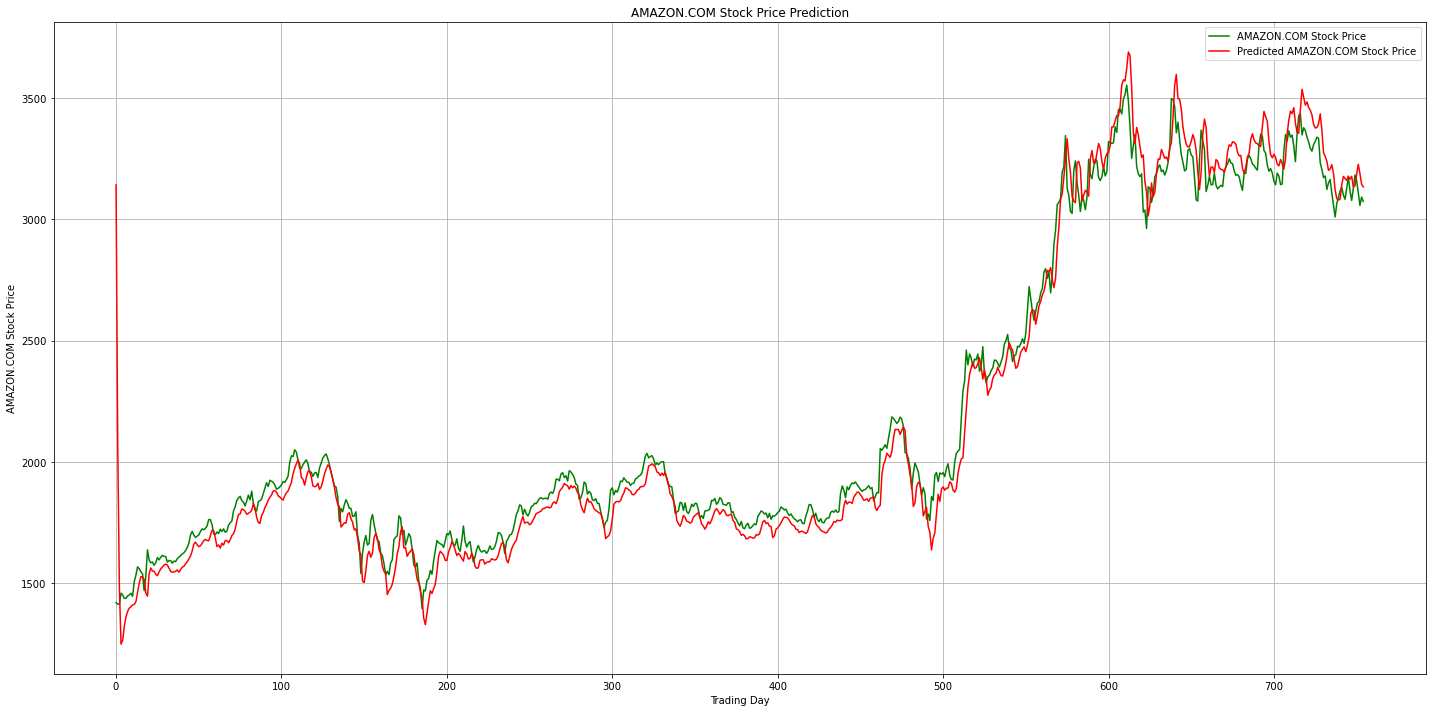

In [34]:
#visualize the results
plt.figure(figsize = (20,10))
plt.plot(real_stock_price, color = 'green', label = 'AMAZON.COM Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted AMAZON.COM Stock Price')
plt.title('AMAZON.COM Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('AMAZON.COM Stock Price')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

##### Looking at the visualization above the model's performance has improved.

#### Model Performance 

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [36]:
lstm_mse=math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('LSTM Model root mean square error', lstm_mse)

LSTM Model root mean square error 104.88462191329695


In [37]:
lstm_R2=r2_score(real_stock_price, predicted_stock_price)
print('LSTM Model R2 score', lstm_R2)

LSTM Model R2 score 0.9719614280456601


In [38]:
lstm_mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('LSTM Model Mean Absolute Error', lstm_mae)

LSTM Model Mean Absolute Error 68.07768667865273


### Saving The Model:

In [39]:
lstm_model.save("copy3_saved_model.h5")

#### Report the Metrics Results or Model Performance

In [40]:
print('LSTM Model root mean square error', lstm_mse)
print('LSTM Model R2 score', lstm_R2)
print('LSTM Model Mean Absolute Error', lstm_mae)

LSTM Model root mean square error 104.88462191329695
LSTM Model R2 score 0.9719614280456601
LSTM Model Mean Absolute Error 68.07768667865273


### Observation

In [41]:
print("The chamge I made which I thought would work was to increase the number of epochs because the previous model slightly underfit. So I increase the     number of epochs to 100.  According to all I see here the improvements work. The predicted stock price is now lrading the actual stock price.") 

The chamge I made which I thought would work was to increase the number of epochs because the previous model slightly underfit. So I increase the     number of epochs to 100.  According to all I see here the improvements work. The predicted stock price is now lrading the actual stock price.


##### Did I improve model performance?

##### Based on the visualization and the performance metrics Having a correctly fitted training model gave better results.

## Model deployment based on new independent test data

##### Prepare new test data

In [42]:
# Get the test_1 data prices start '2021-01-02' end '2021-05-15'
#set period =  from January 02 of 2021 to May 15 of 2021
ticker = yf.Ticker("AMZN")
data_test_1 = ticker.history(start = "2021-01-02", end = "2021-05-15")
data_test_1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,3270.00000,3272.000000,3144.020020,3186.629883,4411400,0,0
2021-01-05,3166.01001,3223.379883,3165.060059,3218.510010,2655500,0,0
2021-01-06,3146.47998,3197.510010,3131.159912,3138.379883,4394800,0,0
2021-01-07,3157.00000,3208.540039,3155.000000,3162.159912,3514500,0,0
2021-01-08,3180.00000,3190.639893,3142.199951,3182.699951,3537700,0,0


In [43]:
data_test_1.shape

(92, 7)

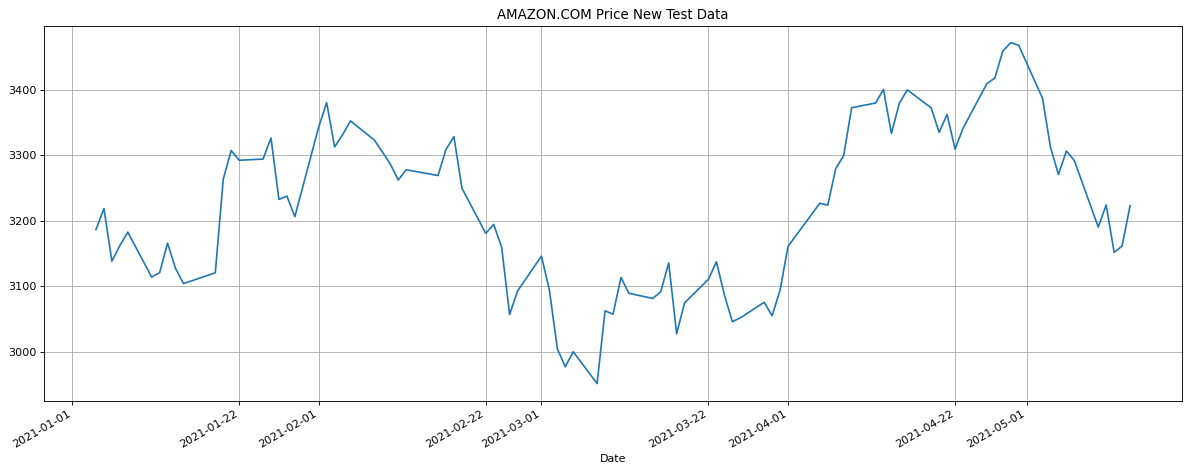

In [44]:
 #Visualize the data
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
data_test_1['Close'].plot()
plt.title("AMAZON.COM Price New Test Data")
plt.tight_layout()
plt.grid()
plt.show()

In [45]:
# Data cleaning # Removing dividends column and stock split column
data_test_1['Date'] = data_test_1.index
df_test_1 = pd.DataFrame(columns = ['Open', 'High', 'Low', 'Close','Volume'])
df_test_1['Open'] = data_test_1['Open']
df_test_1['High'] = data_test_1['High']
df_test_1['Low'] = data_test_1['Low']
df_test_1['Close'] = data_test_1['Close']
df_test_1['Volume']= data_test_1['Volume']
df_test_1.shape

(92, 5)

In [52]:
real_stock_price_new = df_test_1.iloc[:, 1:2].values
dataset_total_1 = pd.concat((df['Open'], df_test_1['Open']), axis = 0)
inputs_1 = dataset_total_1[len(dataset_total_1) - len(df_test_1) - 50:].values 
inputs_1 = inputs_1.reshape(-1, 1)
inputs_1 = sc.fit_transform(inputs_1)
X_test_1 = []
for i in range(50, inputs_1.shape[0]):
    X_test_1.append(inputs_1[i-50:i, 0])
X_test_1 = np.array(X_test_1)
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))

print(X_test_1.shape)

(92, 50, 1)


In [53]:
# Predict the price with the model
predicted_stock_price_new = lstm_model.predict(X_test_1)
predicted_stock_price_new = sc.inverse_transform(predicted_stock_price_new)

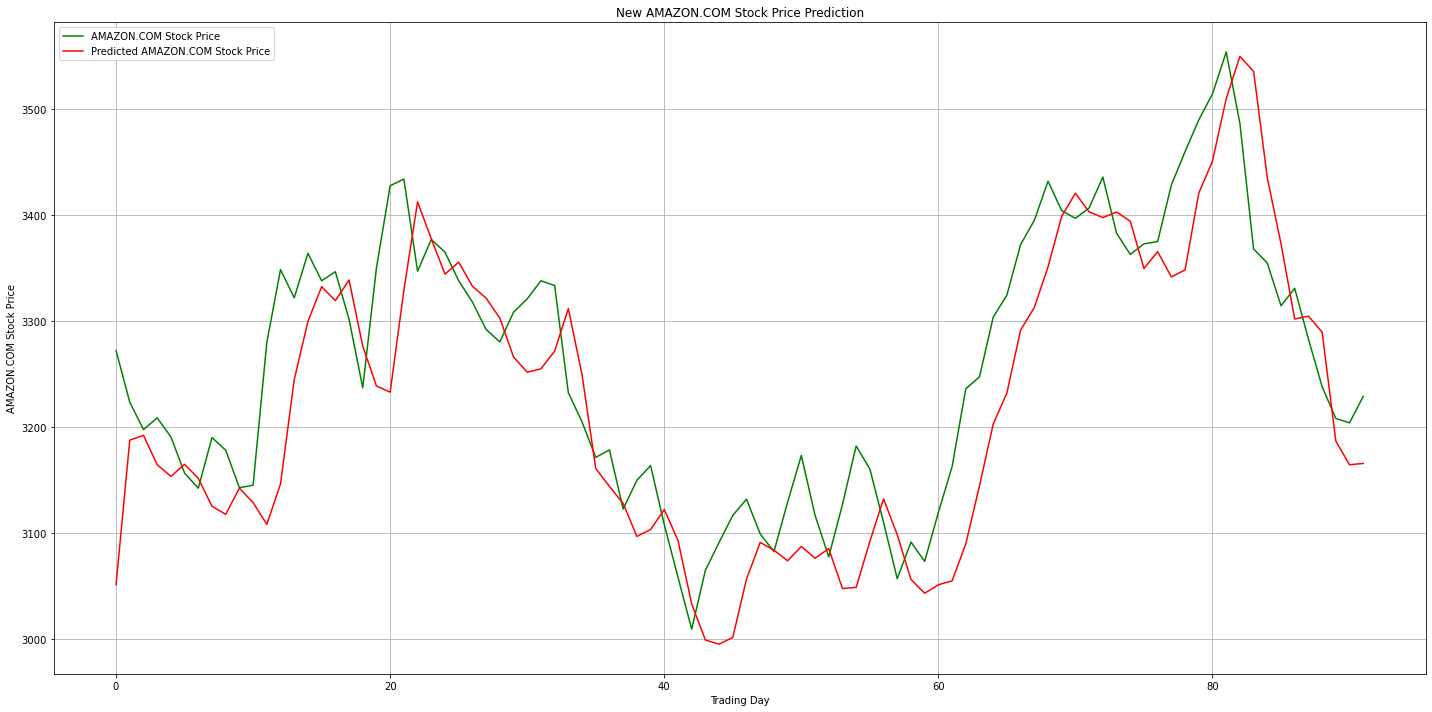

In [54]:
#visualize the results
plt.figure(figsize = (20,10))
plt.plot(real_stock_price_new, color = 'green', label = 'AMAZON.COM Stock Price')
plt.plot(predicted_stock_price_new, color = 'red', label = 'Predicted AMAZON.COM Stock Price')
plt.title('New AMAZON.COM Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('AMAZON.COM Stock Price')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [52]:
print("The End")

The End
